In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv', index_col=0)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [3]:
import seaborn as sns


In [4]:
def cleanData(d):
    numNa = np.sum(d.isna().values.T, axis = 1)
    df = d.drop(d.columns[numNa > 81], axis = 1)
    df.dropna(inplace = True)
    df = pd.get_dummies(df)
    return df


In [5]:
df = cleanData(df)

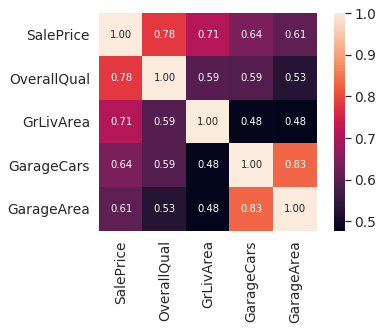

In [7]:
k = 5 #number of variables for heatmap
corrmat = df.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [8]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.datasets import cifar100

Using TensorFlow backend.


In [9]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

from keras.layers import Activation
from keras import metrics

X = df.drop('SalePrice', axis = 1).values
Y = df['SalePrice'].values.reshape(-1,1)
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
scaler = StandardScaler().fit(Y)
Y = scaler.transform(Y)
X = pd.DataFrame(data=X,columns=df.drop('SalePrice', axis = 1).columns)  # 1st row as the column names

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 
t_model = Sequential()
t_model.add(Dense(80, activation="tanh", kernel_initializer='normal', input_shape=(X_train.shape[1],)))
t_model.add(Dropout(0.4))
t_model.add(Dense(120, activation="relu", kernel_initializer='normal', 
    kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
t_model.add(Dropout(0.3))
t_model.add(Dense(20, activation="relu", kernel_initializer='normal', 
    kernel_regularizer=regularizers.l1_l2(0.01), bias_regularizer=regularizers.l1_l2(0.01)))
t_model.add(Dropout(0.2))
t_model.add(Dense(10, activation="relu", kernel_initializer='normal'))
t_model.add(Dropout(0.1))
t_model.add(Dense(y_train.shape[1]))
t_model.compile(
    loss='mean_squared_error',
    optimizer='nadam',
    metrics=[metrics.mae])
print(t_model.summary())



/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 80)                21200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               9720      
_________________________________________________________________
dropout_2 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                2420      
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
__________

In [10]:
history = t_model.fit(X_train, y_train,
    batch_size=128,
    epochs=500,
    shuffle=True,
    verbose=1, # Change it to 2, if wished to observe execution
    validation_data=(X_test, y_test))

Train on 1070 samples, validate on 268 samples
Epoch 1/500
1070/1070 [==============================] - 1s 1ms/step - loss: 5.1867 - mean_absolute_error: 0.7324 - val_loss: 4.0867 - val_mean_absolute_error: 0.6755
Epoch 2/500
1070/1070 [==============================] - 0s 73us/step - loss: 3.7486 - mean_absolute_error: 0.7073 - val_loss: 2.7641 - val_mean_absolute_error: 0.6238
Epoch 3/500
1070/1070 [==============================] - 0s 75us/step - loss: 2.5241 - mean_absolute_error: 0.6243 - val_loss: 1.7400 - val_mean_absolute_error: 0.4951
Epoch 4/500
1070/1070 [==============================] - 0s 75us/step - loss: 1.5983 - mean_absolute_error: 0.4807 - val_loss: 1.1047 - val_mean_absolute_error: 0.3474
Epoch 5/500
1070/1070 [==============================] - 0s 74us/step - loss: 1.0939 - mean_absolute_error: 0.3697 - val_loss: 0.7746 - val_mean_absolute_error: 0.2995
Epoch 6/500
1070/1070 [==============================] - 0s 75us/step - loss: 0.8710 - mean_absolute_error: 0.3583

1070/1070 [==============================] - 0s 61us/step - loss: 0.4046 - mean_absolute_error: 0.2799 - val_loss: 0.5205 - val_mean_absolute_error: 0.2758
Epoch 50/500
1070/1070 [==============================] - 0s 77us/step - loss: 0.4269 - mean_absolute_error: 0.2825 - val_loss: 0.4714 - val_mean_absolute_error: 0.2543
Epoch 51/500
1070/1070 [==============================] - 0s 62us/step - loss: 0.3868 - mean_absolute_error: 0.2746 - val_loss: 0.4866 - val_mean_absolute_error: 0.2613
Epoch 52/500
1070/1070 [==============================] - 0s 62us/step - loss: 0.3660 - mean_absolute_error: 0.2651 - val_loss: 0.4808 - val_mean_absolute_error: 0.2620
Epoch 53/500
1070/1070 [==============================] - 0s 79us/step - loss: 0.3786 - mean_absolute_error: 0.2682 - val_loss: 0.4981 - val_mean_absolute_error: 0.2665
Epoch 54/500
1070/1070 [==============================] - 0s 249us/step - loss: 0.3698 - mean_absolute_error: 0.2692 - val_loss: 0.5392 - val_mean_absolute_error: 0.296

1070/1070 [==============================] - 0s 73us/step - loss: 0.3547 - mean_absolute_error: 0.2786 - val_loss: 0.6495 - val_mean_absolute_error: 0.3212
Epoch 98/500
1070/1070 [==============================] - 0s 51us/step - loss: 0.4042 - mean_absolute_error: 0.2981 - val_loss: 0.5626 - val_mean_absolute_error: 0.3188
Epoch 99/500
1070/1070 [==============================] - 0s 52us/step - loss: 0.3573 - mean_absolute_error: 0.2728 - val_loss: 0.5119 - val_mean_absolute_error: 0.2885
Epoch 100/500
1070/1070 [==============================] - 0s 55us/step - loss: 0.3365 - mean_absolute_error: 0.2683 - val_loss: 0.5411 - val_mean_absolute_error: 0.2769
Epoch 101/500
1070/1070 [==============================] - 0s 54us/step - loss: 0.3606 - mean_absolute_error: 0.2697 - val_loss: 0.5023 - val_mean_absolute_error: 0.3030
Epoch 102/500
1070/1070 [==============================] - 0s 52us/step - loss: 0.3689 - mean_absolute_error: 0.2784 - val_loss: 0.5075 - val_mean_absolute_error: 0.2

1070/1070 [==============================] - 0s 50us/step - loss: 0.3267 - mean_absolute_error: 0.2569 - val_loss: 0.4830 - val_mean_absolute_error: 0.2776
Epoch 146/500
1070/1070 [==============================] - 0s 49us/step - loss: 0.3294 - mean_absolute_error: 0.2592 - val_loss: 0.4921 - val_mean_absolute_error: 0.2774
Epoch 147/500
1070/1070 [==============================] - 0s 71us/step - loss: 0.3473 - mean_absolute_error: 0.2668 - val_loss: 0.4607 - val_mean_absolute_error: 0.2920
Epoch 148/500
1070/1070 [==============================] - 0s 49us/step - loss: 0.3690 - mean_absolute_error: 0.2826 - val_loss: 0.5430 - val_mean_absolute_error: 0.2948
Epoch 149/500
1070/1070 [==============================] - 0s 55us/step - loss: 0.3404 - mean_absolute_error: 0.2753 - val_loss: 0.4403 - val_mean_absolute_error: 0.2681
Epoch 150/500
1070/1070 [==============================] - 0s 50us/step - loss: 0.3557 - mean_absolute_error: 0.2652 - val_loss: 0.5103 - val_mean_absolute_error: 0

1070/1070 [==============================] - 0s 68us/step - loss: 0.3229 - mean_absolute_error: 0.2821 - val_loss: 0.5410 - val_mean_absolute_error: 0.2872
Epoch 194/500
1070/1070 [==============================] - 0s 49us/step - loss: 0.3160 - mean_absolute_error: 0.2633 - val_loss: 0.5994 - val_mean_absolute_error: 0.3050
Epoch 195/500
1070/1070 [==============================] - 0s 50us/step - loss: 0.3308 - mean_absolute_error: 0.2515 - val_loss: 0.4984 - val_mean_absolute_error: 0.2824
Epoch 196/500
1070/1070 [==============================] - 0s 49us/step - loss: 0.3490 - mean_absolute_error: 0.2681 - val_loss: 0.5324 - val_mean_absolute_error: 0.2898
Epoch 197/500
1070/1070 [==============================] - 0s 49us/step - loss: 0.3309 - mean_absolute_error: 0.2655 - val_loss: 0.5789 - val_mean_absolute_error: 0.3158
Epoch 198/500
1070/1070 [==============================] - 0s 49us/step - loss: 0.2862 - mean_absolute_error: 0.2524 - val_loss: 0.5512 - val_mean_absolute_error: 0

1070/1070 [==============================] - 0s 53us/step - loss: 0.3147 - mean_absolute_error: 0.2608 - val_loss: 0.5891 - val_mean_absolute_error: 0.2927
Epoch 242/500
1070/1070 [==============================] - 0s 91us/step - loss: 0.3090 - mean_absolute_error: 0.2551 - val_loss: 0.5257 - val_mean_absolute_error: 0.3218
Epoch 243/500
1070/1070 [==============================] - 0s 52us/step - loss: 0.3254 - mean_absolute_error: 0.2716 - val_loss: 0.6311 - val_mean_absolute_error: 0.3074
Epoch 244/500
1070/1070 [==============================] - 0s 54us/step - loss: 0.3332 - mean_absolute_error: 0.2701 - val_loss: 0.5915 - val_mean_absolute_error: 0.2975
Epoch 245/500
1070/1070 [==============================] - 0s 53us/step - loss: 0.3300 - mean_absolute_error: 0.2612 - val_loss: 0.5642 - val_mean_absolute_error: 0.2922
Epoch 246/500
1070/1070 [==============================] - 0s 53us/step - loss: 0.3100 - mean_absolute_error: 0.2574 - val_loss: 0.6278 - val_mean_absolute_error: 0

1070/1070 [==============================] - 0s 45us/step - loss: 0.2864 - mean_absolute_error: 0.2511 - val_loss: 0.6324 - val_mean_absolute_error: 0.3114
Epoch 290/500
1070/1070 [==============================] - 0s 41us/step - loss: 0.3123 - mean_absolute_error: 0.2597 - val_loss: 0.6406 - val_mean_absolute_error: 0.3516
Epoch 291/500
1070/1070 [==============================] - 0s 41us/step - loss: 0.3185 - mean_absolute_error: 0.2719 - val_loss: 0.6780 - val_mean_absolute_error: 0.3032
Epoch 292/500
1070/1070 [==============================] - 0s 41us/step - loss: 0.3056 - mean_absolute_error: 0.2621 - val_loss: 0.5554 - val_mean_absolute_error: 0.2851
Epoch 293/500
1070/1070 [==============================] - 0s 41us/step - loss: 0.3088 - mean_absolute_error: 0.2481 - val_loss: 0.6201 - val_mean_absolute_error: 0.3062
Epoch 294/500
1070/1070 [==============================] - 0s 225us/step - loss: 0.3369 - mean_absolute_error: 0.2711 - val_loss: 0.5720 - val_mean_absolute_error: 

1070/1070 [==============================] - 0s 47us/step - loss: 0.2851 - mean_absolute_error: 0.2553 - val_loss: 0.6470 - val_mean_absolute_error: 0.3148
Epoch 338/500
1070/1070 [==============================] - 0s 48us/step - loss: 0.3073 - mean_absolute_error: 0.2597 - val_loss: 0.6933 - val_mean_absolute_error: 0.3254
Epoch 339/500
1070/1070 [==============================] - 0s 48us/step - loss: 0.3042 - mean_absolute_error: 0.2645 - val_loss: 0.7209 - val_mean_absolute_error: 0.3309
Epoch 340/500
1070/1070 [==============================] - 0s 48us/step - loss: 0.2961 - mean_absolute_error: 0.2554 - val_loss: 0.4964 - val_mean_absolute_error: 0.2881
Epoch 341/500
1070/1070 [==============================] - 0s 47us/step - loss: 0.2839 - mean_absolute_error: 0.2586 - val_loss: 0.5077 - val_mean_absolute_error: 0.2888
Epoch 342/500
1070/1070 [==============================] - 0s 47us/step - loss: 0.2892 - mean_absolute_error: 0.2566 - val_loss: 0.6636 - val_mean_absolute_error: 0

1070/1070 [==============================] - 0s 60us/step - loss: 0.2815 - mean_absolute_error: 0.2611 - val_loss: 0.6301 - val_mean_absolute_error: 0.3216
Epoch 386/500
1070/1070 [==============================] - 0s 59us/step - loss: 0.2479 - mean_absolute_error: 0.2297 - val_loss: 0.6206 - val_mean_absolute_error: 0.3095
Epoch 387/500
1070/1070 [==============================] - 0s 63us/step - loss: 0.3007 - mean_absolute_error: 0.2499 - val_loss: 0.5863 - val_mean_absolute_error: 0.3087
Epoch 388/500
1070/1070 [==============================] - 0s 60us/step - loss: 0.3142 - mean_absolute_error: 0.2624 - val_loss: 0.6668 - val_mean_absolute_error: 0.3214
Epoch 389/500
1070/1070 [==============================] - 0s 60us/step - loss: 0.2880 - mean_absolute_error: 0.2515 - val_loss: 0.6011 - val_mean_absolute_error: 0.3338
Epoch 390/500
1070/1070 [==============================] - 0s 57us/step - loss: 0.2946 - mean_absolute_error: 0.2647 - val_loss: 0.6338 - val_mean_absolute_error: 0

1070/1070 [==============================] - 0s 55us/step - loss: 0.2913 - mean_absolute_error: 0.2618 - val_loss: 0.5416 - val_mean_absolute_error: 0.3035
Epoch 434/500
1070/1070 [==============================] - 0s 60us/step - loss: 0.2865 - mean_absolute_error: 0.2575 - val_loss: 0.6081 - val_mean_absolute_error: 0.3165
Epoch 435/500
1070/1070 [==============================] - 0s 53us/step - loss: 0.2881 - mean_absolute_error: 0.2514 - val_loss: 0.5571 - val_mean_absolute_error: 0.2944
Epoch 436/500
1070/1070 [==============================] - 0s 56us/step - loss: 0.2743 - mean_absolute_error: 0.2508 - val_loss: 0.5699 - val_mean_absolute_error: 0.2991
Epoch 437/500
1070/1070 [==============================] - 0s 58us/step - loss: 0.2797 - mean_absolute_error: 0.2601 - val_loss: 0.5424 - val_mean_absolute_error: 0.3214
Epoch 438/500
1070/1070 [==============================] - 0s 48us/step - loss: 0.2947 - mean_absolute_error: 0.2667 - val_loss: 0.5571 - val_mean_absolute_error: 0

1070/1070 [==============================] - 0s 57us/step - loss: 0.3283 - mean_absolute_error: 0.2644 - val_loss: 0.6549 - val_mean_absolute_error: 0.3319
Epoch 482/500
1070/1070 [==============================] - 0s 40us/step - loss: 0.2938 - mean_absolute_error: 0.2567 - val_loss: 0.7142 - val_mean_absolute_error: 0.3558
Epoch 483/500
1070/1070 [==============================] - 0s 41us/step - loss: 0.2964 - mean_absolute_error: 0.2395 - val_loss: 0.5787 - val_mean_absolute_error: 0.3087
Epoch 484/500
1070/1070 [==============================] - 0s 41us/step - loss: 0.3152 - mean_absolute_error: 0.2544 - val_loss: 0.7316 - val_mean_absolute_error: 0.3604
Epoch 485/500
1070/1070 [==============================] - 0s 42us/step - loss: 0.2886 - mean_absolute_error: 0.2539 - val_loss: 0.6131 - val_mean_absolute_error: 0.3180
Epoch 486/500
1070/1070 [==============================] - 0s 43us/step - loss: 0.3386 - mean_absolute_error: 0.2641 - val_loss: 0.5655 - val_mean_absolute_error: 0

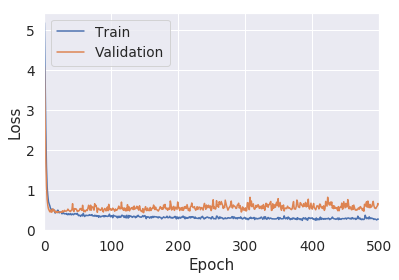

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.xlim(0., 500)
plt.savefig('validation.png')


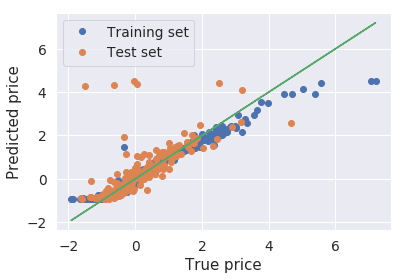

In [12]:
plt.clf()
pred = t_model.predict(X_train)
pred_test = t_model.predict(X_test)

plt.plot(y_train, pred, 'o', label = 'Training set')
plt.plot(y_test, pred_test, 'o', label = 'Test set')
plt.plot(Y, Y, '-')
plt.legend(loc='best')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.savefig('neuralnet.png')

In [14]:
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_squared_error(y_test, pred_test))
print('\n')
print(mean_absolute_error(y_test, pred_test))
print('\n')
print(pearsonr(pred_test, y_test)[0])


0.507545082165


0.31110914568522186


[0.75094502]
